In [77]:
# importing neccessery libriries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import holidays 

ModuleNotFoundError: No module named 'holidays'

In [50]:
df_daily = pd.read_csv("Data_raw\CBS_2021-2023_Daily_Weather.csv",sep = ",")

df_daily.head()

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Leon\AppData\Local\Temp\ipykernel_11768\1753049123.py:1: SyntaxWarning: invalid escape sequence '\C'
  df_daily = pd.read_csv("Data_raw\CBS_2021-2023_Daily_Weather.csv",sep = ",")


,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h)
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2


In [51]:
df_daily.dtypes
df_daily.columns = df_daily.columns.str.lower()

In [55]:
# Checking for NULLs in the data
df_daily.isnull().sum()
if_dupped = df_daily.duplicated()

#No dupliates
for elements in if_dupped:
    if elements == "True":
        print(elements)
    else:
        pass
    

In [53]:
#has no null data:
#casual                            0
#date                              0
#member                            0
#total_rides                       0
#apparent_temperature_mean (°c)    0
#temperature_2m_mean (°c)          0
#weathercode (wmo code)            0
#windspeed_10m_max (km/h)          0
#climate                           0
#weekday                           0
#weekday_name                      0


In [56]:
df_daily.head(5)

,casual,date,member,total_rides,apparent_temperature_mean (°c),temperature_2m_mean (°c),weathercode (wmo code),windspeed_10m_max (km/h)
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2


In [57]:
df_daily["climate"] = df_daily["apparent_temperature_mean (°c)"].apply(lambda value: "cold"
                                                                if value <= 5 else "temperate"
                                                                if value <= 15 else "warm"
                                                                ) 

df_daily["climate"] = pd.Categorical(df_daily["climate"], categories = ["cold","temperate","warm"])


df_daily.dtypes

casual                               int64
date                                object
member                               int64
total_rides                          int64
apparent_temperature_mean (°c)     float64
temperature_2m_mean (°c)           float64
weathercode (wmo code)               int64
windspeed_10m_max (km/h)           float64
climate                           category
dtype: object

In [59]:
df_daily['date'] = pd.to_datetime(df_daily['date'])
df_daily['weathercode (wmo code)'] = df_daily['weathercode (wmo code)'].astype('category')


In [ ]:
df_daily.dtypes

casual                                     int64
date                              datetime64[ns]
member                                     int64
total_rides                                int64
apparent_temperature_mean (°c)           float64
temperature_2m_mean (°c)                 float64
weathercode (wmo code)                  category
windspeed_10m_max (km/h)                 float64
climate                                 category
dtype: object

In [61]:
# extract weekdays using dt.dayofweek
df_daily['weekday'] = df_daily['date'].dt.dayofweek



In [62]:
# extract weekdays using dt.day_name()
df_daily['weekday_name'] = df_daily['date'].dt.day_name()
df_daily['is_weekend'] = df_daily["date"].dt.weekday >= 5

In [63]:


df_daily.head(5)

,casual,date,member,total_rides,apparent_temperature_mean (°c),temperature_2m_mean (°c),weathercode (wmo code),windspeed_10m_max (km/h),climate,weekday,weekday_name,is_weekend
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,cold,4,Friday,False
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,cold,5,Saturday,True
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,cold,6,Sunday,True
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,cold,0,Monday,False
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,cold,1,Tuesday,False


In [64]:
uniques = df_daily["weathercode (wmo code)"].unique()

#print(len(uniques))
indices = np.argsort(uniques)
ordered_arr = uniques[indices]

for elements in ordered_arr:
    print(elements)

code_map = {
0:"Cloud development not observed or not observable",                  
1:"Cloud generally dissolving or becoming less developed",                  
2:"State of sky on the whole unchanged",                                
3:"Clouds generally forming or developing",
51:"Drizzle, not freezing, continuous, slight at time of ob.",
53:"Drizzle, not freezing, continuous, moderate at time of ob.",                           
55:"Drizzle, not freezing, continuous, heavy at time of ob.",
61:"Rain, not freezing, continuous, slight at time of ob.",                                  
63:"Rain, not freezing, continuous, moderate at time of ob.",                
65:"Rain, not freezing, continuous, heavy at time of ob.",
71:"Continuous fall of snowflakes, slight at time of ob.",
73:"Continuous fall of snowflakes, moderate at time of ob.",
75:"Continuous fall of snowflakes, heavy at time of ob."}

weather_type_map = {
0:"Sunny",                  
1:"Sunny",                  
2:"Sunny",                                
3:"Cloudy",
51:"Drizzle",
53:"Drizzle",                           
55:"Drizzle",
61:"Rain",                                  
63:"Rain",                
65:"Rain",
71:"Snow",
73:"Snow",
75:"Snow"}

df_daily['weather_description'] = df_daily['weathercode (wmo code)'].map(code_map)


df_daily["weather_type"] = df_daily['weathercode (wmo code)'].map(weather_type_map)
df_daily.head()


0
1
2
3
51
53
55
61
63
65
71
73
75


,casual,date,member,total_rides,apparent_temperature_mean (°c),temperature_2m_mean (°c),weathercode (wmo code),windspeed_10m_max (km/h),climate,weekday,weekday_name,is_weekend,weather_description,weather_type
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,cold,4,Friday,False,"Rain, not freezing, continuous, moderate at ti...",Rain
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,cold,5,Saturday,True,"Rain, not freezing, continuous, slight at time...",Rain
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,cold,6,Sunday,True,"Rain, not freezing, continuous, moderate at ti...",Rain
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,cold,0,Monday,False,Clouds generally forming or developing,Cloudy
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,cold,1,Tuesday,False,"Drizzle, not freezing, continuous, slight at t...",Drizzle


In [ ]:
#Add column for weekday 
df_daily['date'] = pd.to_datetime(df_daily['date'])
df_daily['weekday_name'] = df_daily['date'].dt.day_name()

In [65]:

df_daily["percentage_members_vs_casuals(%)"] = round((df_daily["member"]/(df_daily["casual"] + df_daily["member"]))*100,2)

df_daily.head(5)




,casual,date,member,total_rides,apparent_temperature_mean (°c),temperature_2m_mean (°c),weathercode (wmo code),windspeed_10m_max (km/h),climate,weekday,weekday_name,is_weekend,weather_description,weather_type,percentage_members_vs_casuals(%)
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,cold,4,Friday,False,"Rain, not freezing, continuous, moderate at ti...",Rain,61.39
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,cold,5,Saturday,True,"Rain, not freezing, continuous, slight at time...",Rain,49.74
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,cold,6,Sunday,True,"Rain, not freezing, continuous, moderate at ti...",Rain,69.59
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,cold,0,Monday,False,Clouds generally forming or developing,Cloudy,69.57
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,cold,1,Tuesday,False,"Drizzle, not freezing, continuous, slight at t...",Drizzle,65.47


In [ ]:

#POSSIBLE PLOTS:
#x percentage of casual users vs members on weekend vs week days
# total members on weather code 0 (no clouds) vs total members weather code 65 (raining, heavy at time of ob.) 

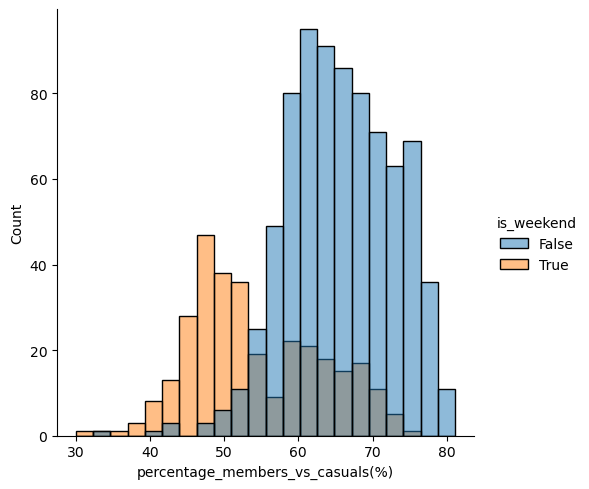

In [67]:
#percentage of casual users vs members on weekend vs week days
#sns.histplot(data=df_daily, x="percentage_members_vs_casuals(%)", hue="weekday_name")
sns.displot(data=df_daily, x="percentage_members_vs_casuals(%)", hue="is_weekend")


<Axes: xlabel='percentage_members_vs_casuals(%)', ylabel='Density'>

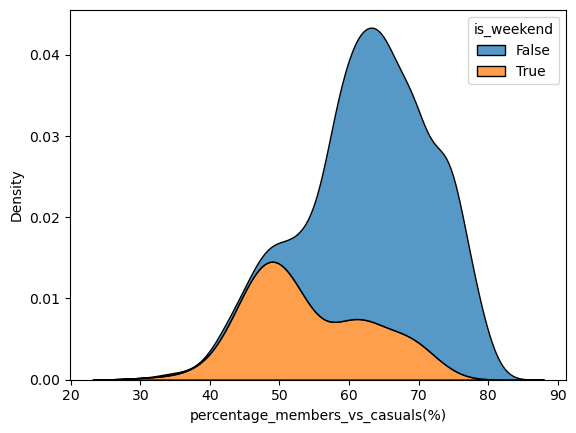

In [68]:
#sns.scatterplot(data=df_daily, x="weekday_name", y="percentage_members_vs_casuals(%)", hue="weekday_name")
sns.kdeplot(data=df_daily, x ="percentage_members_vs_casuals(%)", hue="is_weekend", multiple="stack")

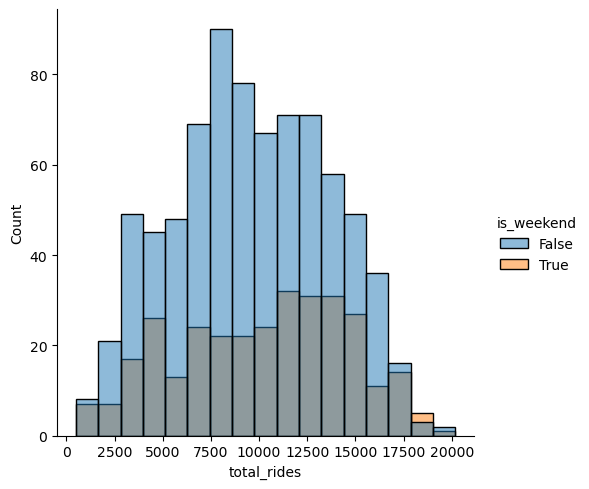

In [ ]:
# total members on weekend vs week days DOESNT WORK, 5 vs 2 days isnt a good comparison, only ratio is 


In [71]:
df_daily.head(2)

,casual,date,member,total_rides,apparent_temperature_mean (°c),temperature_2m_mean (°c),weathercode (wmo code),windspeed_10m_max (km/h),climate,weekday,weekday_name,is_weekend,weather_description,weather_type,percentage_members_vs_casuals(%)
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,cold,4,Friday,False,"Rain, not freezing, continuous, moderate at ti...",Rain,61.39
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,cold,5,Saturday,True,"Rain, not freezing, continuous, slight at time...",Rain,49.74


<Axes: xlabel='is_weekend', ylabel='percentage_members_vs_casuals(%)'>

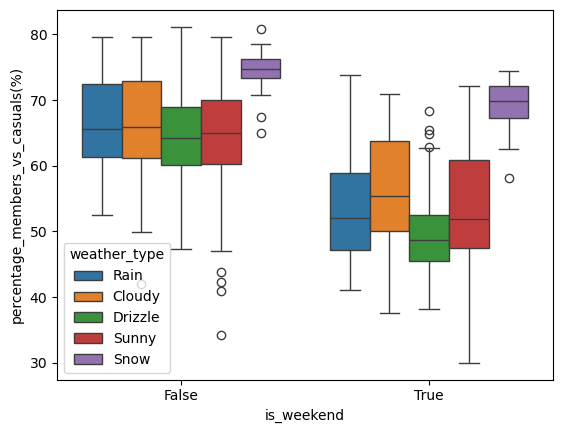

In [76]:
#percentage rides on different weathers
sns.boxplot(data=df_daily, x="is_weekend", y="percentage_members_vs_casuals(%)", hue="weather_type")